# Prophet 라이브러리

메타(페이스북)에서 발표한 시계열 분석 머신러닝 라이브러리

`prophet` 라이브러리의 설치가 필요하다.

> https://facebook.github.io/prophet/

> https://peerj.com/preprints/3190.pdf

## #01. 준비작업

### [1] 패키지 참조

In [5]:
from hossam.util import *
from hossam.plot import *
from hossam.timeserise import *
import warnings
warnings.filterwarnings(action='ignore')
from prophet import Prophet
from prophet.plot import add_changepoints_to_plot

### [2] 데이터 가져오기

In [2]:
origin = my_read_excel('https://data.hossam.kr/tsdata/air_passengers.xlsx')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Month       144 non-null    datetime64[ns]
 1   Passengers  144 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.4 KB
None

데이터프레임 상위 5개 행
+----+---------------------+--------------+
|    | Month               |   Passengers |
|----+---------------------+--------------|
|  0 | 1949-01-01 00:00:00 |          112 |
|  1 | 1949-02-01 00:00:00 |          118 |
|  2 | 1949-03-01 00:00:00 |          132 |
|  3 | 1949-04-01 00:00:00 |          129 |
|  4 | 1949-05-01 00:00:00 |          121 |
+----+---------------------+--------------+

데이터프레임 하위 5개 행
+-----+---------------------+--------------+
|     | Month               |   Passengers |
|-----+---------------------+--------------|
| 139 | 1960-08-01 00:00:00 |          606 |
| 140 | 1960-09-01 00:00:00 |     

## #02. 데이터 전처리

### [1] 데이터 프레임의 필드 이름 변경

prophet 라이브러리의 요구사항에 따라 날짜 필드의 이름을 `ds`로, 데이터의 필드 이름을 `y`로 변경해야 한다.

날짜의 데이터 타입은 `datetime` 형식이어야 한다.

> 날짜 변수가 인덱스가 아님에 유의

In [3]:
df = origin.rename(columns={'Month': 'ds', 'Passengers': 'y'})
my_pretty_table(df.head())

+----+---------------------+-----+
|    | ds                  |   y |
|----+---------------------+-----|
|  0 | 1949-01-01 00:00:00 | 112 |
|  1 | 1949-02-01 00:00:00 | 118 |
|  2 | 1949-03-01 00:00:00 | 132 |
|  3 | 1949-04-01 00:00:00 | 129 |
|  4 | 1949-05-01 00:00:00 | 121 |
+----+---------------------+-----+


## #03. 시계열 학습 모델 구현

### [1] 모델 정의 및 학습

In [6]:
m = Prophet()
m.fit(df)

16:50:56 - cmdstanpy - INFO - Chain [1] start processing
16:50:57 - cmdstanpy - INFO - Chain [1] done processing


### [2] 학습결과를 활용하여 예측

`periods`는 예측할 기간 (일(`D`), 월(`M`) 단위 설정 가능 / 기본은 일단위)

In [7]:
future = m.make_future_dataframe(periods=365, freq='D')
forecast = m.predict(future)
my_pretty_table(forecast.head())

+----+---------------------+---------+--------------+--------------+---------------+---------------+------------------+------------------------+------------------------+-----------+----------------+----------------+------------------------+------------------------------+------------------------------+---------+
|    | ds                  |   trend |   yhat_lower |   yhat_upper |   trend_lower |   trend_upper |   additive_terms |   additive_terms_lower |   additive_terms_upper |    yearly |   yearly_lower |   yearly_upper |   multiplicative_terms |   multiplicative_terms_lower |   multiplicative_terms_upper |    yhat |
|----+---------------------+---------+--------------+--------------+---------------+---------------+------------------+------------------------+------------------------+-----------+----------------+----------------+------------------------+------------------------------+------------------------------+---------|
|  0 | 1949-01-01 00:00:00 | 106.662 |      55.9253 |      11

### [3] 예측 결과에 대한 시각화

- 검은색 점 : 실 데이터
- 파란색 선 : 모델이 예측한 데이터

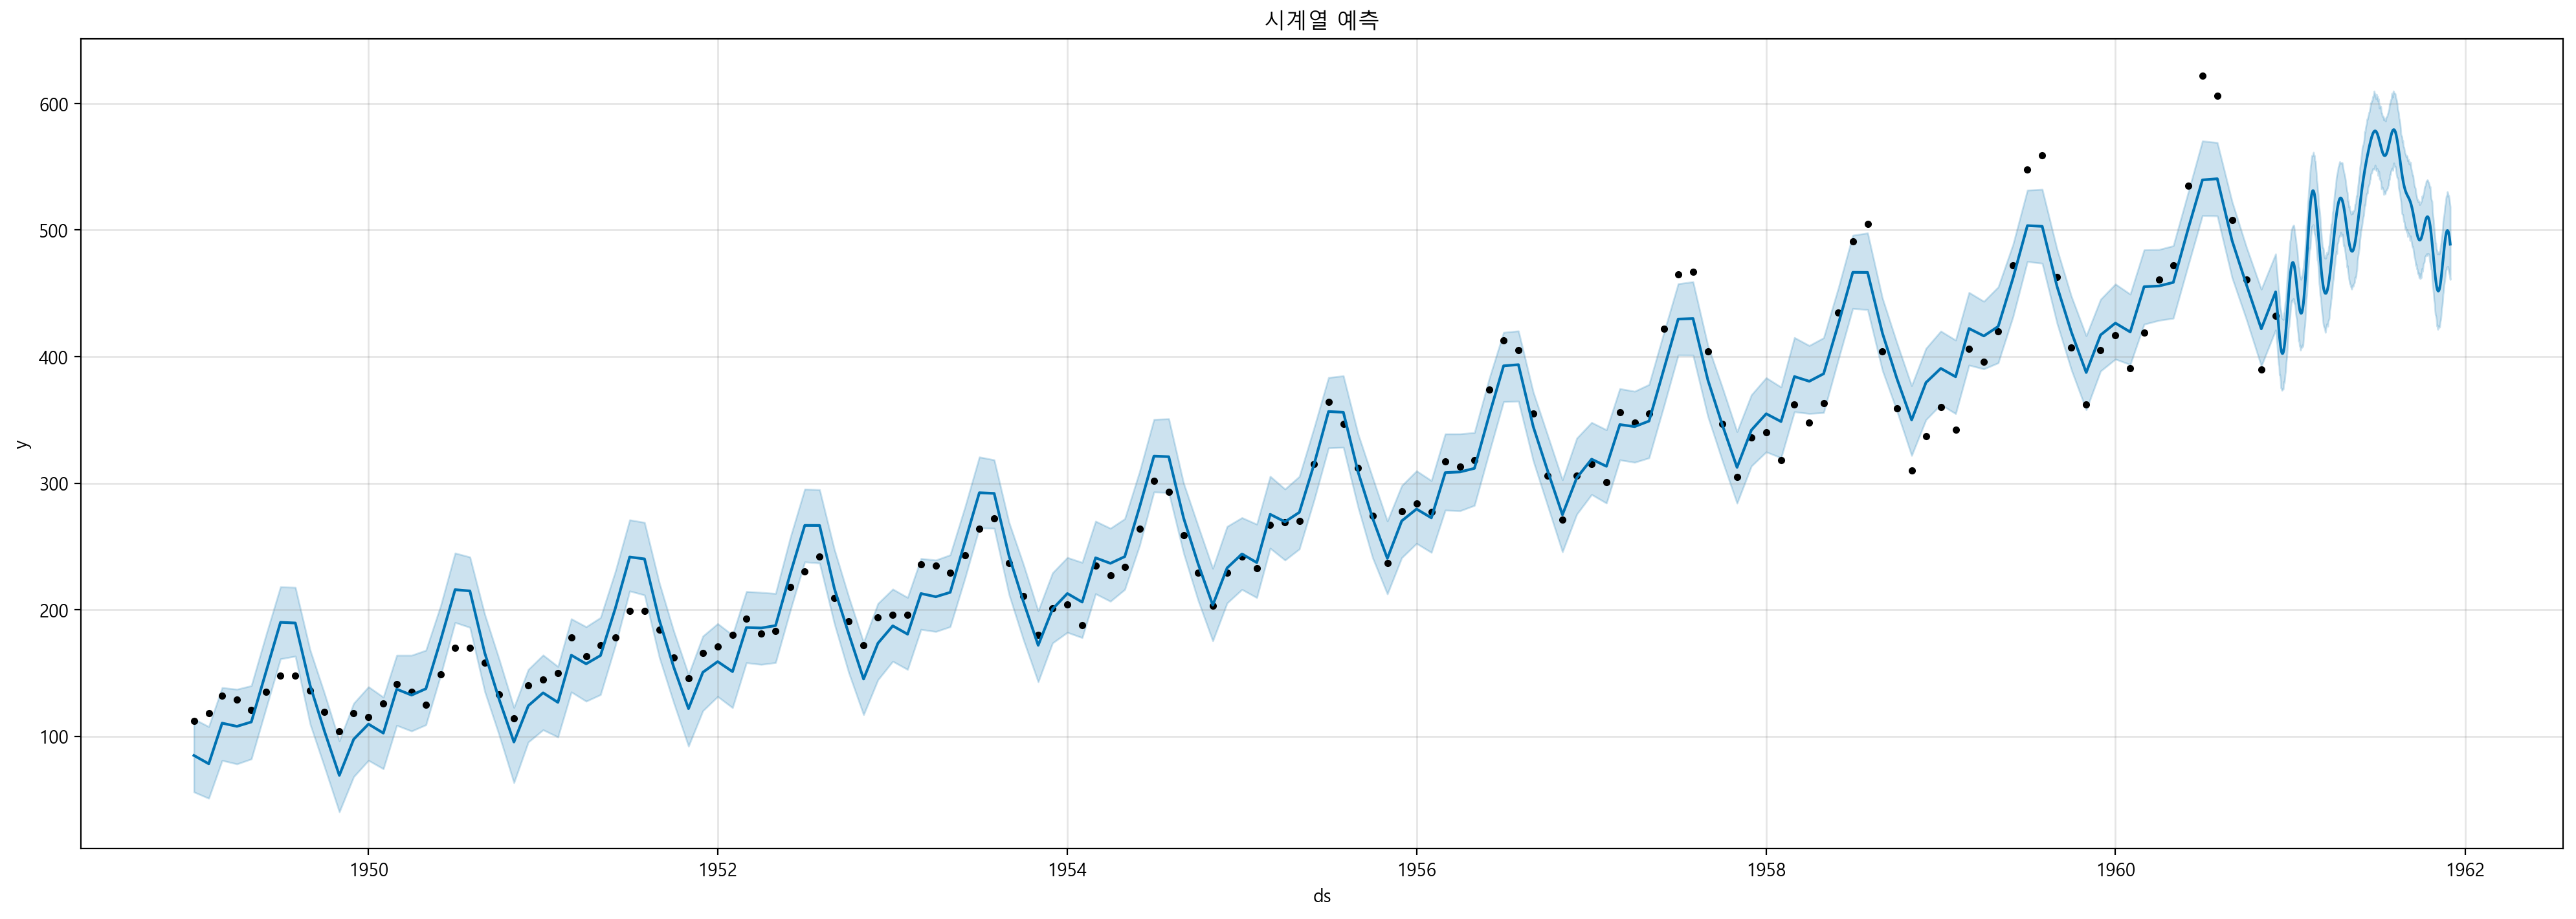

In [8]:
fig = m.plot(forecast, figsize=(20,7))
ax = fig.gca()
ax.set_title('시계열 예측')
plt.show()
plt.close()

### [4] 모델이 갖는 컴포넌트 확인 (성분분해)

### [5] changepoint 를 추가한 시각화

`changepoint` - Trend가 변화하는 지점

- fig.gca() : 시계열 그래프
- m : 미리 만들어준 Prophet 객체
- forecast : predict 결과

In [1]:
from sklearn.model_selection import GridSearchCV